In [6]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import morphology
from math import ceil, floor

In [9]:
def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 1 the pixels above the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr


def normalization(g):
    g = (((g - g.min())* 255)/(g.max() - g.min()))
    return g

#still deciding a method to define the threshold, here we though about a method using the mean and log 
def Limit(img):
    return 10/np.log(255-np.mean(img))*np.mean(image1)
"""
def sum_neighboors(img):
    count = 0;
    if (img[x-1][y-1] == 1):
        count += [x-1][y-1];
    if (img[x-1][y] == 1):
        count += img[x-1][y];
    if (img[x-1][y+1] == 1):
        count += img[x][y-1];
    if (img[x][y-1] == 1):
        count += img[x][y-1];
    if (img[x][y] == 1):
        count += img[x][y];
    if (img[x][y+1] == 1):
        count += img[x][y+1];
    if (img[x+1][y-1] == 1):
        count += mg[x+1][y-1];
    if (img[x+1][y] == 1):
        count += 
    if (img[x+1][y+1] == 1):
"""        

'\ndef sum_neighboors(img):\n    count = 0;\n    if (img[x-1][y-1] == 1):\n        count += [x-1][y-1];\n    if (img[x-1][y] == 1):\n        count += img[x-1][y];\n    if (img[x-1][y+1] == 1):\n        count += img[x][y-1];\n    if (img[x][y-1] == 1):\n        count += img[x][y-1];\n    if (img[x][y] == 1):\n        count += img[x][y];\n    if (img[x][y+1] == 1):\n        count += img[x][y+1];\n    if (img[x+1][y-1] == 1):\n        count += mg[x+1][y-1];\n    if (img[x+1][y] == 1):\n        count += \n    if (img[x+1][y+1] == 1):\n'

122.6726808252624
119.86648147839036
117.56772415330461
116.46396856179645


Text(0.5, 1.0, 'thresholded image')

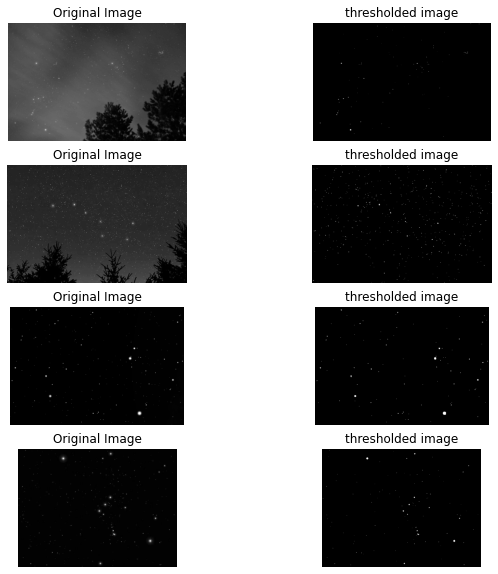

In [186]:
image1 = imageio.imread('Images/Orion/photo1.jpg', as_gray=True)
image2 = imageio.imread('Images/Ursa_Major/the-big-dipper.jpg', as_gray=True)
image3 = imageio.imread('Images/Cancer/con_CNC_001.png', as_gray=True)
image4 = imageio.imread('Images/Orion/Orion-07db06a.jpg', as_gray=True)


#hist1,_ = np.histogram(image1, bins=256, range=(0,256))
#hist1 = histogram(image1, 265)
#plt.subplot(221); plt.bar(range(256), hist1)

#hist2,_ = np.histogram(image2, bins=256, range=(0,256))
#hist2 = histogram(image2, 256)
#plt.subplot(222); plt.bar(range(256), hist2)

L = Limit(image1)
print(L)
img_o1 = thresholding(image1,150)


L = Limit(image2)
print(L)
img_o2 = thresholding(image2,L)


L = Limit(image3)
print(L)
img_o3 = thresholding(image3,L)


L = Limit(image4)
print(L)
img_o4 = thresholding(image4,L)



plt.figure(figsize=(10,10))
plt.subplot(421); plt.imshow(image1, cmap="gray"); plt.axis('off'); plt.title('Original Image')
plt.subplot(422); plt.imshow(img_o1, cmap="gray"); plt.axis('off'); plt.title('thresholded image')
plt.subplot(423); plt.imshow(image2, cmap="gray"); plt.axis('off'); plt.title('Original Image')
plt.subplot(424); plt.imshow(img_o2, cmap="gray"); plt.axis('off'); plt.title('thresholded image')
plt.subplot(425); plt.imshow(image3, cmap="gray"); plt.axis('off'); plt.title('Original Image')
plt.subplot(426); plt.imshow(img_o3, cmap="gray"); plt.axis('off'); plt.title('thresholded image')
plt.subplot(427); plt.imshow(image4, cmap="gray"); plt.axis('off'); plt.title('Original Image')
plt.subplot(428); plt.imshow(img_o4, cmap="gray"); plt.axis('off'); plt.title('thresholded image')

In [187]:
brightest = morphology.binary_dilation(img_o3, morphology.disk(4)).astype(np.uint8)

In [188]:
def first(n): 
    return n[0] 

def getAndRemoveNeighboors(curPixelPos, whitePixels, pixelsToBeProcessed, pixelCluster):          
        neighboors = {(curPixelPos[0]-1, curPixelPos[1]-1), (curPixelPos[0]-1, curPixelPos[1]), (curPixelPos[0]-1, curPixelPos[1]+1),
                      (curPixelPos[0], curPixelPos[1]-1),   (curPixelPos[0], curPixelPos[1]),   (curPixelPos[0], curPixelPos[1]+1),
                      (curPixelPos[0]+1, curPixelPos[1]-1), (curPixelPos[0]+1, curPixelPos[1]), (curPixelPos[0]+1, curPixelPos[1]+1)
                     }
        
        if (pixelCluster.count(curPixelPos) == 0):
            pixelCluster.append(curPixelPos)
            
        for p in neighboors:
            if p in whitePixels:
                pixelsToBeProcessed.append(p)
                pixelCluster.append(p)
                whitePixels.remove(p)
        
        return whitePixels, pixelsToBeProcessed, pixelCluster

def clustering(img):
    whitePixels = set()
    recognizedClusters = []
    
    n, m = img.shape
    for x in range(n):
        for y in range(m):
            if (img[x,y] == 1):
                whitePixels.add(tuple([x,y]))
                
    print(len(whitePixels))
    #return sorted(whitePixels, key=lambda tup: tup[0])
                
    while (len(whitePixels) != 0):
        pixelCluster = []
        pixelsToBeProcessed = []
        
        p = whitePixels.pop()
        pixelsToBeProcessed.append(p)
        
        while (len(pixelsToBeProcessed) != 0):
            curPixel = pixelsToBeProcessed[0]
            whitePixels, pixelsToBeProcessed, pixelCluster = getAndRemoveNeighboors(curPixel, whitePixels, pixelsToBeProcessed, pixelCluster)
            pixelsToBeProcessed.remove(curPixel)
    
        recognizedClusters.append(pixelCluster)
        
        print()
    
    return recognizedClusters
    

In [189]:
clustering(img_o1 )

391


























































































[[(5, 892), (6, 892), (5, 893), (6, 893), (6, 894), (5, 894)],
 [(569, 40),
  (570, 39),
  (569, 39),
  (570, 41),
  (570, 40),
  (569, 41),
  (571, 40),
  (570, 42),
  (569, 42),
  (571, 41)],
 [(606, 215),
  (606, 214),
  (607, 215),
  (607, 214),
  (605, 213),
  (607, 213),
  (606, 213),
  (608, 216),
  (608, 215),
  (608, 214),
  (608, 213),
  (606, 212),
  (605, 212),
  (608, 212),
  (607, 212),
  (609, 216),
  (609, 215),
  (609, 214),
  (609, 213),
  (609, 212),
  (606, 211),
  (607, 211),
  (608, 211),
  (609, 211),
  (610, 215),
  (610, 214),
  (610, 213),
  (610, 212),
  (610, 211),
  (607, 210),
  (606, 210),
  (608, 210),
  (609, 210),
  (610, 210),
  (611, 215),
  (611, 214),
  (611, 213),
  (611, 212),
  (611, 211),
  (611, 210),
  (608, 209),
  (609, 209),
  (610, 209),
  (612, 213)],
 [(421, 151)],
 [(234, 590),
  (235, 590),
  (235, 589),
  (234, 591),
  (233, 589),
  (233, 591),
  (235, 591),
  (233, 590),
  (234, 589),
  (234, 588),
  (232, 589),
  (232, 588),
  (233

{(0, 1), (1, 2), (2, 1), (0, 0), (1, 1), (2, 0), (0, 2), (2, 2), (1, 0)}
